# Lab 6
## Dan Shao, Yingjie Gao

### Exercise #1 - 4 points

Diamonds are the crown jewel of the jewelry industry. As a luxury item, there is a broad range of quality-related characteristics and prices, designed to accommodate many customer segments. The attached data filePreview the document contains sample data on 6,000 diamonds. Each row contains a summary of characteristics for each diamond, including the **4 C's (carat weight, color, clarity, cut), polish, symmetry, certifying agency (report), and price**. More information on the 4 C's can be found at this link (Links to an external site.).

Use appropriate techniques for data analysis and visualization, along with relevant features in matplotlib, pandas, and Seaborn to create two high-quality visualization exhibits of your choice. You will be graded on the quality of the visualizations and your explanations of the insights, but also the richness of your story.

After submitting your Jupyter Notebook for the assignment, please also post your visualizations and descriptions to the Discussion board so that the entire class can view. This will create an online showcase for the interesting ideas generated by your classmates.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

* **Cut**: The GIA grades Diamond Cut on the scale of **Signature-ideal, Ideal, Excellent, Very Good, Good, Fair and Poor**
* **Color**: The GIA grades diamonds from D to Z, with D being the most colorless, and Z containing noticeable brown or yellow tint.
* **Clarity** is graded by the GIA on the following scale:
    1. FL (Flawless)
    2. IF (Internally Flawless)
    3. VVS1 (Very, Very Slightly Included 1)
    4. VVS2 (Very, Very Slightly Included 2)
    5. VS1 (Very Slightly Included 1)
    6. VS2 (Very Slightly Included 2)
    7. SI1 (Slightly Included 1)
    8. SI2 (Slightly Included 2)
    9. I1 (Inclusions 1)
    10. I2 (Inclusions 2)
    
    
* **Polish**: Each Lumera Diamond displays the polish grade as determined by the GIA, using the following scale: **Ideal, Excellent, Very Good, Good.**
* **Symmetry**: Same as Polish, each Lumera Diamond displays the symmetry grade as determined by the GIA, using the following scale: **Ideal, Excellent, Very Good, Good.**
* **Report**: The most consistent entities—and the ones we recommend gaining a certificate from—are the **GIA and the AGS.**

In [2]:
diamond = pd.read_csv('diamonds.csv',index_col='ID')
diamond.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
ID,,,,,,,,
1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


We need to check whether the data is clean enought before we do visualization. I will check is there any missing values first, and then to see if there is any obvious wrong values.

* There is no missing value, which is good!

In [3]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 1 to 6000
Data columns (total 8 columns):
Carat Weight    6000 non-null float64
Cut             6000 non-null object
Color           6000 non-null object
Clarity         6000 non-null object
Polish          6000 non-null object
Symmetry        6000 non-null object
Report          6000 non-null object
Price           6000 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 421.9+ KB


* In order to make our data more readable, we replace the abbreviations in **Symmetry and Polish**.

In [4]:
diamond.Polish = diamond['Polish'].map({'ID': 'Ideal', 'EX':'Excellent', 'VG':'Very Good', 'G':'Good'})
diamond.Symmetry = diamond['Symmetry'].map({'ID': 'Ideal', 'EX':'Excellent', 'VG':'Very Good', 'G':'Good'})

In [5]:
diamond.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
ID,,,,,,,,
1,1.10,Ideal,H,SI1,Very Good,Excellent,GIA,5169
2,0.83,Ideal,H,VS1,Ideal,Ideal,AGSL,3470
3,0.85,Ideal,H,SI1,Excellent,Excellent,GIA,3183
4,0.91,Ideal,E,SI1,Very Good,Very Good,GIA,4370
5,0.83,Ideal,G,SI1,Excellent,Excellent,GIA,3171


We did some simple processing for the data as a good preparation for the following data visualization exercises. We plan to answer the following questions:
* **Question 1**: What are the correlation relationships among those features?
* **Question 2**: What are the Price distributions for different important factors?

### Question 1: What are the correlation relationships among those features?
In order to answer this question, we need to convert all levels of categorical variables into numeric type. For example, we will replace 'Signature-Ideal' in Cut column with value 5, and 'Ideal' with 4, etc. We will process in that way for all categorical columns first.

In [6]:
diamond['Cut_num'] = diamond['Cut'].map({'Signature-Ideal': 5, 'Ideal':4, 'Very Good':3, 'Good':2, 'Fair':1})
diamond['Color_num'] = diamond['Color'].map({'D': 6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1})
diamond['Clarity_num'] = diamond['Clarity'].map({'FL': 7, 'IF':6, 'VVS1':5, 'VVS2':4, 'VS1':3, 'VS2':2, 'SI1':1})
diamond['Polish_num'] = diamond['Polish'].map({'Ideal':4, 'Excellent':3, 'Very Good':2, 'Good':1})
diamond['Symmetry_num'] = diamond['Symmetry'].map({'Ideal':4, 'Excellent':3, 'Very Good':2, 'Good':1})

In [7]:
diamond.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Cut_num,Color_num,Clarity_num,Polish_num,Symmetry_num
ID,,,,,,,,,,,,,
1,1.10,Ideal,H,SI1,Very Good,Excellent,GIA,5169,4,2,1,2,3
2,0.83,Ideal,H,VS1,Ideal,Ideal,AGSL,3470,4,2,3,4,4
3,0.85,Ideal,H,SI1,Excellent,Excellent,GIA,3183,4,2,1,3,3
4,0.91,Ideal,E,SI1,Very Good,Very Good,GIA,4370,4,5,1,2,2
5,0.83,Ideal,G,SI1,Excellent,Excellent,GIA,3171,4,3,1,3,3


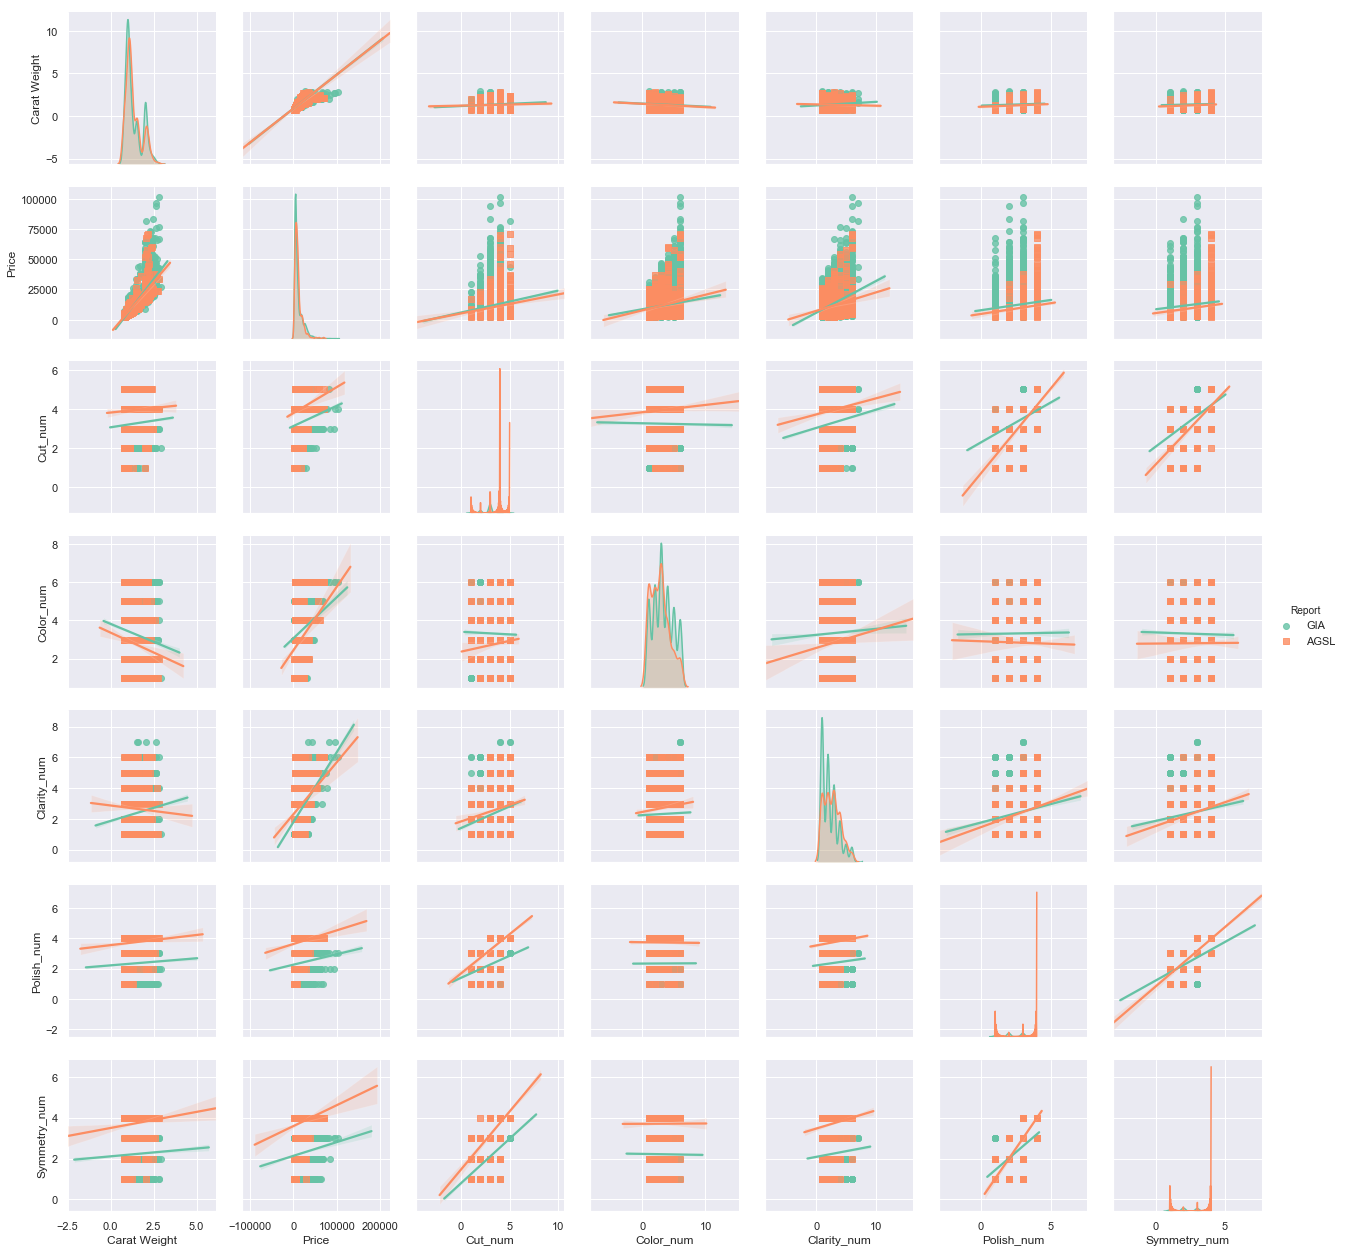

In [8]:
sns.pairplot(diamond, kind="reg", hue="Report", markers=["o", "s"], palette="Set2")

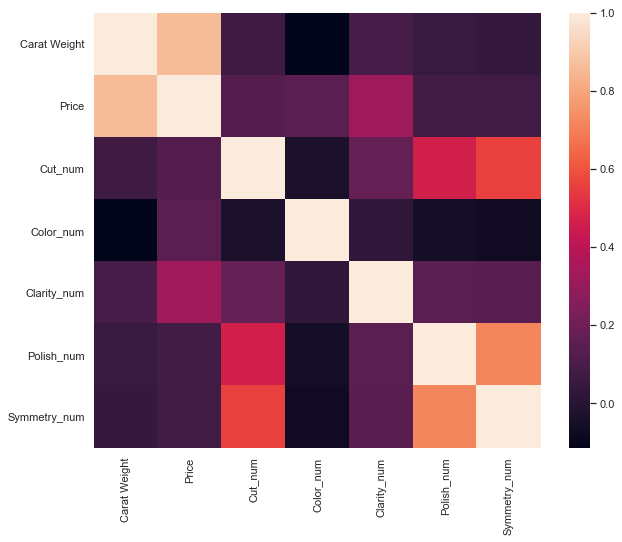

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = diamond.iloc[:,[0,7,8,9,10,11,12]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### Findings:
1. Carat Weight of a diamond has strong positive relationship with its price. The correlation rate is around 0.8.


2. All other indexes of a diamond have positive relationships with price, which means if the carat weight is larger, the better the diamond is cut, more pure, flawless and symmetric the diamond is, the better the diamond is polished, the price will be higher. Apart from Carat Weight, Clarity is another factor that has a stronger relationship with price compared with other features. In reality, Carat Weight and Clarity is the most obvious measurements of a diamond for customers to judge the value of the diamond, therefore affecting the price of diamonds. 


3. There is a positive relationship between Cut, Polish and Symmetry. This can be explained by the fact that diamond cut, the biggest indicator to define diamond beauty, is determined by the quality of a diamond’s angles, proportions, symmetrical facets, brilliance, fire, and so on. So better polish and symmetery are indications of good cut.


4. Color has no significant relationship with other features. Since certain colored diamonds are valued stones, like a fancy pink or green diamond, color grades for these diamonds are distinctly different than traditional “white” diamonds. It is possible that those certain colored diamonds are also very high-priced.

All in all, the carat weight is the most influential factor determining the price of a dimaond, while other features, such as Clarity and Cut, are also positively impact on the price. Based on our findings, we thought the most valuable factors for us to explore are Carat Weight and Clarity, which we will provide more analyses in the next question.

### Question 2: What are the Price distributions for different important factors?
By answering the last question, we have known that Carat weight is the most important factor, with about 0.8 correlation rate. We choose Carat Weight and Clarity as the two important factors to make a scatter chart for the distribution of Price.

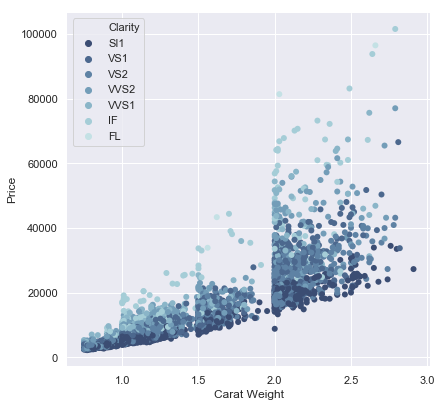

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Carat Weight", y="Price",
                hue="Clarity",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=diamond, ax=ax);

#### Findings:
We found that for the same carat-weight diamond, the higher the clearity level, the higher the price. Moreover, this trend will become more obvious as the number of carats increases. For example, a 2-carat diamond has a price range of less than 20,000 to more than 60,000, and a high-priced diamond has a significantly higher clarity rating. This also means that large diamonds with high clarity are very very rare and their price will depend more on clarity rather than carat weight. In summary, for small diamonds, carat size has a greater impact on the price of a diamond, and clarity has a greater impact on the price as the carat size increases.